In [16]:
import numpy as np
import warnings
from scipy.special import expit # sigmoid function
# For typing
import numpy.typing as npt
from collections.abc import Callable

In [38]:
class Perceptron:
    """
    (A.K.A. neuron) The most basic unit of the network. Each perceptron has an
    activation that can either be initialized directly, or calculated given
    a vector of activations (presumably from other perceptrons), a matrix of 
    weights, and a vector of biases as inputs.
    """
    def __init__(self, 
                 activations: npt.ArrayLike=None, 
                 weights: npt.NDArray=None, # must be 2D
                 biases: npt.ArrayLike=None, 
                 activation_function: Callable=expit,
                 activation=None) -> None:
        # If an activation is provided, set the perceptron's activation
        if activation is not None:
            self.activation = activation
            if activations or weights or biases:
                warnings.warn("Activation given. Inputted activations, weights, and biases given as input will be ignored.")
        # Otherwise, calculate as usual
        elif activations and weights and biases and activation_function:
            # Input validation
            if weights.ndim != 2:
                raise ValueError("Weights must be a 2D array.")
            if biases.ndim != 1:
                raise ValueError("Biases must be a 1D array.")
            if activations.ndim != 1:
                raise ValueError("Activations must be a 1D array.")
            if weights.shape[1] != activations.size or weights.shape[0] != biases.size:
                raise ValueError("Shape mismatch: weights, activations, and biases dimensions are incompatible.")
            self.activation = activation_function(weights @ activations + biases)
        else:
            raise ValueError("No activation given, and activations, weights, biases are not given.")
        

assert Perceptron(activation=0.1).activation == 0.1

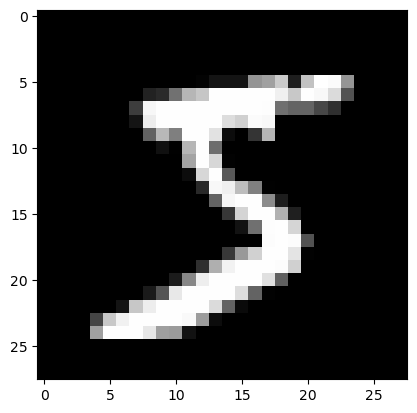

In [22]:
# From https://stackoverflow.com/a/25079162/18031673
import gzip
import pickle
import matplotlib.cm as cm
import matplotlib.pyplot as plt


# Load MNIST dataset
with gzip.open('mnist.pkl.gz', 'rb') as f:
    # This was likely encoded in Python2---to fix, using encoding 'latin1'
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

# train_x: inputs (pictures of digits)
# train_y: outputs (labels of digits)
train_x, train_y = train_set


# Show an example image
plt.imshow(train_x[0].reshape((28, 28)), cmap=cm.Greys_r)
plt.show()